In [4]:
import numpy as np
import matplotlib.pyplot as plt

def FFT(signal):
    N = len(signal)
    if N <= 1:
        return signal
    even = FFT(signal[0::2])
    odd = FFT(signal[1::2])
    spectra = np.zeros(N, dtype = "complex")

    for k in range(N//2):
        angle = -2*np.pi*k/N
        factor = odd[k]*complex(np.cos(angle), np.sin(angle))
        spectra[k] = even[k] + factor
        spectra[k+(N//2)] = even[k] - factor

    return spectra

def FFTFrec(N, d):
    frecuencies = []

    for i in range(N):
        if i <= N//2:
            freq = i/(N*d)
            
        else:
            freq = (i - N)/(N*d)

        frecuencies.append(freq)

    return frecuencies

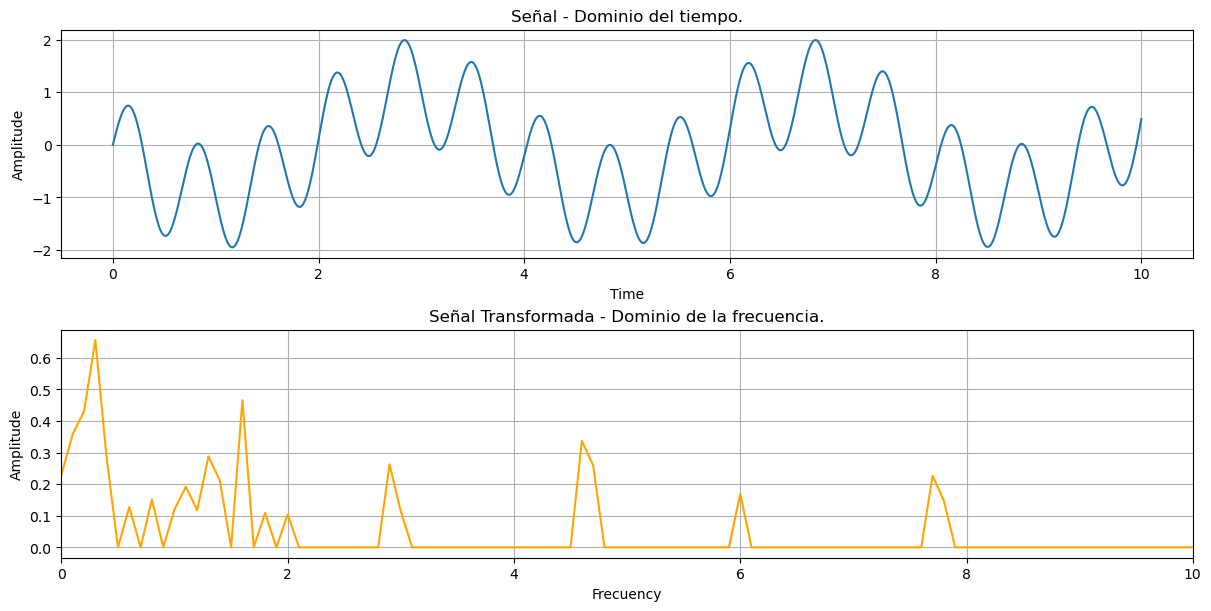

La frecuencia dominate es:0.30 Hz 

frecuencia:0.00 Hz, Magnitud:0.23
frecuencia:0.10 Hz, Magnitud:0.36
frecuencia:0.20 Hz, Magnitud:0.43
frecuencia:0.30 Hz, Magnitud:0.66
frecuencia:0.40 Hz, Magnitud:0.28
frecuencia:0.60 Hz, Magnitud:0.13
frecuencia:0.80 Hz, Magnitud:0.15
frecuencia:1.00 Hz, Magnitud:0.12
frecuencia:1.10 Hz, Magnitud:0.19
frecuencia:1.20 Hz, Magnitud:0.12
frecuencia:1.30 Hz, Magnitud:0.29
frecuencia:1.40 Hz, Magnitud:0.21
frecuencia:1.60 Hz, Magnitud:0.47
frecuencia:1.80 Hz, Magnitud:0.11
frecuencia:2.00 Hz, Magnitud:0.10
frecuencia:2.90 Hz, Magnitud:0.26
frecuencia:3.00 Hz, Magnitud:0.11
frecuencia:4.60 Hz, Magnitud:0.34
frecuencia:4.70 Hz, Magnitud:0.26
frecuencia:6.00 Hz, Magnitud:0.17
frecuencia:7.70 Hz, Magnitud:0.23
frecuencia:7.80 Hz, Magnitud:0.15
frecuencias de resonancia:1.10 Hz
frecuencias de resonancia:1.20 Hz
frecuencias de resonancia:1.30 Hz
frecuencias de resonancia:1.40 Hz
frecuencias de resonancia:1.50 Hz
frecuencias de resonancia:1.60 Hz
frecuencias 

In [101]:
sampleRate = 100
duration = 10
resonanceFreq= 1.5
noise = np.random.normal(n)

n = int(duration * sampleRate)

t = np.linspace(0, duration, n)

signal = np.sin(2*np.pi*(2*noise)*t)
signal += np.sin(2*np.pi*resonanceFreq*t)

N = len(signal)

results = FFT(signal)
amp = [abs(x)*(2/len(results)) for x in results]
amp = amp[:N//2]
frecuencies = FFTFrec(N, d=1/sampleRate)[:N//2]

umbral = 0.1
filterAmp = [m if m > umbral else 0 for m in amp]
dominatFreq = [(frecuencies[i], amp[i]) for i in range(len(amp)) if amp[i] > umbral]

tol = 0.4
filterFrec = [f for f in frecuencies if np.abs(f-resonanceFreq) < tol]

fig, ax = plt.subplots(2, 1, figsize = (12, 6), layout = "constrained")

ax[0].plot(t, signal)
ax[0].set_title("Señal - Dominio del tiempo.")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amplitude")
ax[0].grid()
ax[1].plot(frecuencies, filterAmp, color="orange")
ax[1].set_title("Señal Transformada - Dominio de la frecuencia.")
ax[1].set_xlabel("Frecuency")
ax[1].set_ylabel("Amplitude")
ax[1].set_xlim([0,10])
ax[1].grid()

plt.show()

pIndex = np.argmax(amp)
major_frec = frecuencies[pIndex]
print(f"La frecuencia dominate es:{major_frec:.2f} Hz \n")

for f, a in dominatFreq:

    print(f"frecuencia:{f:.2f} Hz, Magnitud:{a:.2f}")

for f in filterFrec:

    print(f"frecuencias de resonancia:{f:.2f} Hz")